## Metis ML Classification Project Baseline Models

Chaya Wurman

Goal: Given the CDC NHANES (National Health and Nutrition Examination Survey) data,
can we predict if a patient has had a stroke. Strokes are caused by many medical and
lifestyle factors, and knowing which factors are highly correlated with strokes can
help better predict those who are at higher risk and help mitigate the risk before
a potential life-threatening event happens.

This notebook is for creating some of the initial models & scoring the performance,
with the goal of ultimately tuning it for something better later.

In [2]:
# Import all our necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load all the data
data = pd.read_csv("data_feature_engineered.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  5583 non-null   int64  
 1   chest_pain                                  5583 non-null   float64
 2   high_blood_pressure_diagnosed               5583 non-null   float64
 3   high_blood_cholesterol                      5583 non-null   float64
 4   overweight_diagnosed                        5583 non-null   float64
 5   coronary_heart_disease                      5583 non-null   float64
 6   LABEL_had_stroke                            5583 non-null   float64
 7   diabetes_diagnosed                          5583 non-null   float64
 8   diabetes_high_blood_sugar_but_not_diabetes  5583 non-null   float64
 9   smoking_smoked_at_least_100_cigarettes      5583 non-null   float64
 10  income_famil

In [5]:
# Take just a few features out from here and see if we are still able to train in that scenario
data = data[["diabetes_diagnosed", "age_years", "highest_education_level", "weight_kg", "diet_is_on", "LABEL_had_stroke"]]


In [6]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "LABEL_had_stroke"]
y = data.LABEL_had_stroke

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)



In [13]:
# Deal with class imbalanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


In [16]:
# Train a simple model to test
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

Initial accuracy: 0.7170993733213966
Initial recall score: 0.7804878048780488


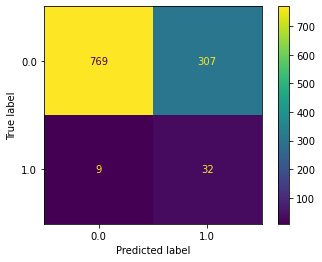

In [17]:
# Score our initial models
score = logreg.score(X_test, y_test)
print(f"Initial accuracy: {score}")

predictions = logreg.predict(X_test)
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)
print(f"Initial recall score: {recall}")


from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)


Conclusions from initial observation
 - Our accuracy and recall are similar, but this model could definitely still be better!
 - Next steps:
   - Perform a smarter oversampling technique instead of just random oversampling
   - Use more of the features available to us and ultimately see if we can get a interpretable model
   - Experiment with tuning a few different types of models and we what we can get